In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [22]:
img = cv2.imread('colour.jpg')

In [23]:
print img #What is the dimesion of this array?

[[[  6  16  16]
  [  6  16  16]
  [  6  16  16]
  ..., 
  [  0 182 252]
  [  0 182 252]
  [  0 182 252]]

 [[  6  16  16]
  [  6  16  16]
  [  6  16  16]
  ..., 
  [  0 182 252]
  [  0 182 252]
  [  0 182 252]]

 [[  6  16  16]
  [  6  16  16]
  [  6  16  16]
  ..., 
  [  0 182 252]
  [  0 182 252]
  [  0 182 252]]

 ..., 
 [[ 74  42   0]
  [ 70  38   0]
  [ 75  43   0]
  ..., 
  [151 186 159]
  [149 184 157]
  [145 183 155]]

 [[ 83  51   8]
  [ 78  46   3]
  [ 75  43   0]
  ..., 
  [149 184 157]
  [148 183 156]
  [144 182 154]]

 [[ 73  41   0]
  [ 73  41   0]
  [ 74  42   0]
  ..., 
  [149 184 157]
  [148 183 156]
  [145 183 155]]]


In [24]:
"""
Notice the output of img.shape. The last parameter this time depicts the number of channels, as it is a coloured image
"""

print img.shape

print img.size



(640, 427, 3)
819840


In [25]:
some_pixel=img[10,10]

print some_pixel 



[ 6 16 16]


In [26]:
"""
Let's try splitting all the colours (techincally called the channels)!
cv2.split() is a costly operation (in terms of time), so only use it if necessary.
"""

b,g,r = cv2.split(img)

"""
For merging, use - 

img_name=cv2.merge((b,g,r))
"""

print b


[[  6   6   6 ...,   0   0   0]
 [  6   6   6 ...,   0   0   0]
 [  6   6   6 ...,   0   0   0]
 ..., 
 [ 74  70  75 ..., 151 149 145]
 [ 83  78  75 ..., 149 148 144]
 [ 73  73  74 ..., 149 148 145]]


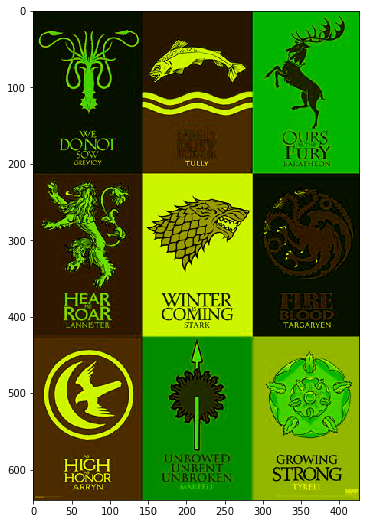

In [50]:
"""
Lets try displaying our original image using matplotlib
"""

plt.imshow(img)
plt.show()

## Exercise!

As you can see, the colours are weird. Not definitely the correct combination.
Try displaying the right coloured image.

Hint - If you listened well, you would get it :)

In [28]:
#Code goes here!




## Intuition

Lets play a little more with colour channels.

Since cv2.split() function is very expensive, we'll refrain from using that. Lets try to remove the blue channel completely from the original img variable.

Hint : Matrices and Multiplication!


In [34]:
#Code goes here!




### Border making and padding images

cv2.copyMakeBorder() is the main function that is used to add borders and padding in any image.
However a more mathematical use-case of this function can be during __convulation__ of images, or zero padding around images.


* src - input image

* top, bottom, left, right - border width in number of pixels in corresponding directions

* borderType - Flag defining what kind of border to be added. It can be following types:

    1. cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
    1. cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
    1. cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
    1. cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
    1. cv2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg
    
    
* value - Color of border if border type is cv2.BORDER_CONSTANT

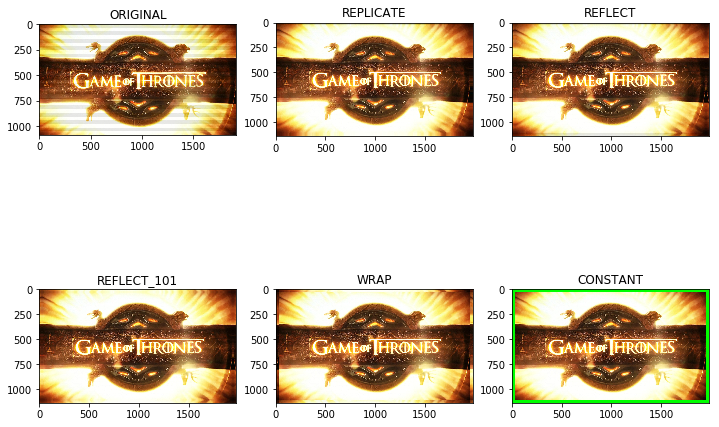

Current size: [12.0, 9.0]
Current size: [12, 9]


In [41]:
"""
Obtaining the right colour combination for display
"""

img2=cv2.imread("colour2.jpg")

b,g,r=cv2.split(img2)

img3=cv2.merge((r,g,b))

"""
Just another matplotlib tip! Change the window size!!
"""
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 48
fig_size[1] = 36
plt.rcParams["figure.figsize"] = fig_size

print "Current size:", fig_size


"""
All the different types of padding shown. 

"""
replicate = cv2.copyMakeBorder(img3,30,30,30,30,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img3,30,30,30,30,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img3,30,30,30,30,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img3,30,30,30,30,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img3,30,30,30,30,cv2.BORDER_CONSTANT,value=[0,255,0])




"""
New function! Subplot is used to plot many images/graphs in the same window. 

Note - All images in a subplot window share the same axis. Is useful in making comparative graphs. The arguments -

234 means 2x3 grid, 4th subplot


"""

plt.subplot(231),plt.imshow(img3,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()




In [ ]:
## Print the above new images made to understand how the padding has been done in the matrix.






## Exercise!

Zero padding is sometimes the most important way of filtering images. You need to zero pad the Original Image with zeros and dispay. You can choose any number of pixels to pad.

In [ ]:
#Code goes here!






### Adding Images

Yes! Images can be added. However, there are two kinds of addition. NumPy addition and OpenCV Addition.
OpenCV addition is a saturated operation while Numpy addition is a modulo operation.


In [42]:
x = np.uint8([250])
y = np.uint8([10])

print cv2.add(x,y) # 250+10 = 260 => 255

print x+y          # 250+10 = 260 % 256 


[[255]]
[4]


### Where is Image Addition used?

Blending Images!! 

We use a concept called weighted addition, which is pretty much the same as Weighted mean. Weights lie between 0 to 1.

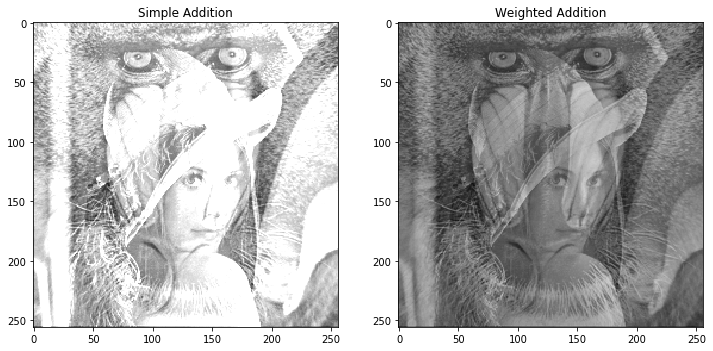

In [49]:
img4=cv2.imread("baboon256.tif")
img5=cv2.imread("lena256.tif")

new=cv2.add(img4,img5)
dst = cv2.addWeighted(img4,0.6,img5,0.4,0)

plt.subplot(121),plt.imshow(new,'gray'),plt.title('Simple Addition')
plt.subplot(122),plt.imshow(dst,'gray'),plt.title('Weighted Addition')
plt.show()

## Intution

Suppose we would like to extract some part of the image and blend it with another. Suppose we would like only a particular section of the image out, with the background removed. How?

Hint - _Set Theory!_